In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# Load the CSV files
metadata_df = pd.read_csv('/content/drive/MyDrive/PHD_MMU/Skin_Lesion_Classification/ISIC_2019_Filtered_Dataset/Filtered_ISIC_2019_Training_Metadata.csv')
groundtruth_df = pd.read_csv('/content/drive/MyDrive/PHD_MMU/Skin_Lesion_Classification/ISIC_2019_Filtered_Dataset/Filtered_ISIC_2019_Training_GroundTruth.csv')


print('Metadata csv:\n',metadata_df.head())
print('\n')
print('Ground Truth csv:\n', groundtruth_df.head())

Metadata csv:
           image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male


Ground Truth csv:
           image  MEL  NV  BCC  AK  BKL  DF  VASC  SCC
0  ISIC_0000000    0   1    0   0    0   0     0    0
1  ISIC_0000001    0   1    0   0    0   0     0    0
2  ISIC_0000002    1   0    0   0    0   0     0    0
3  ISIC_0000003    0   1    0   0    0   0     0    0
4  ISIC_0000004    1   0    0   0    0   0     0    0


In [ ]:
# Define a function to create a combined class label
def create_combined_class(row):
    classes = []
    if row['MEL'] == 1:
        classes.append('MEL')
    if row['NV'] == 1:
        classes.append('NV')
    if row['BCC'] == 1:
        classes.append('BCC')
    if row['AK'] == 1:
        classes.append('AK')
    if row['BKL'] == 1:
        classes.append('BKL')
    if row['DF'] == 1:
        classes.append('DF')
    if row['VASC'] == 1:
        classes.append('VASC')
    if row['SCC'] == 1:
        classes.append('SCC')
    return ','.join(classes)

# Apply the function to create a new column
groundtruth_df['combined_class'] = groundtruth_df.apply(create_combined_class, axis=1)

# Drop the original binary columns
binary_columns = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']
groundtruth_df = groundtruth_df.drop(columns=binary_columns)

# Save the transformed data to a new CSV file
new_file_path = '/content/drive/MyDrive/PHD_MMU/Skin_Lesion_Classification/train_val_test_split/ground_truth_v1.csv'
groundtruth_df.to_csv(new_file_path, index=False)

print(f"Transformed data saved to {new_file_path}")


Transformed data saved to /content/drive/MyDrive/PHD_MMU/Skin_Lesion_Classification/train_val_test_split/ground_truth_v1.csv


In [ ]:
from sklearn.preprocessing import LabelEncoder

# label encoding to numeric values from text
le = LabelEncoder()
le.fit(groundtruth_df['combined_class'])
LabelEncoder()
#print(list(le.classes_))

#combined_df['label'] = le.transform(combined_df["combined_class"])
#print(combined_df.sample(10))

# Display the mapping of labels to integers
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)



Label Mapping: {'AK': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'MEL': 4, 'NV': 5, 'SCC': 6, 'VASC': 7}


combined_class
NV      508
MEL     179
BCC     131
BKL     104
AK       34
SCC      25
VASC     10
DF        9
Name: count, dtype: int64


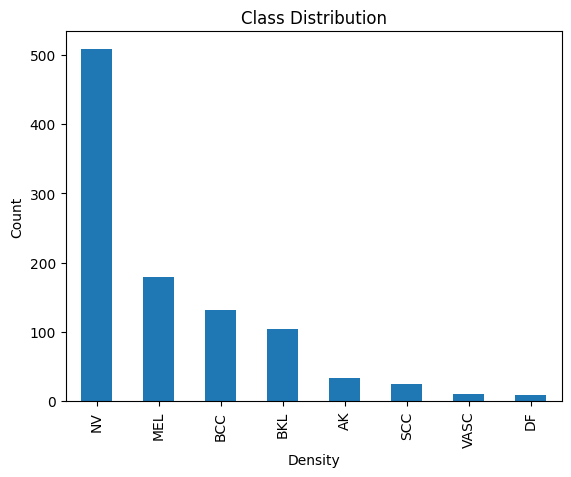

In [ ]:
# Assuming 'density' is the target variable
class_counts = groundtruth_df['combined_class'].value_counts()
print(class_counts)

# Visualize class distribution
class_counts.plot(kind='bar', title='Class Distribution')
plt.xlabel('Density')
plt.ylabel('Count')
plt.show()


In [ ]:
groundtruth_df['label'] = le.transform(groundtruth_df['combined_class'])
print(groundtruth_df.sample(10))


                        image combined_class  label
288              ISIC_0000322             NV      5
843              ISIC_0024662           VASC      7
61   ISIC_0000063_downsampled             NV      5
31   ISIC_0000032_downsampled             NV      5
650              ISIC_0009927            MEL      4
266              ISIC_0000293            MEL      4
143  ISIC_0000152_downsampled            MEL      4
541  ISIC_0002287_downsampled             NV      5
948              ISIC_0026154            BCC      1
531  ISIC_0001449_downsampled             NV      5


In [ ]:
import os

# List all files in the directory
image_folder = '/content/drive/MyDrive/PHD_MMU/Skin_Lesion_Classification/ISIC_2019_Filtered_Dataset/Images/'  # Correct directory path
existing_files = os.listdir(image_folder)

print(f"Number of files in the directory: {len(existing_files)}")
print(f"First 10 files in the directory: {existing_files[:10]}")


Number of files in the directory: 1000
First 10 files in the directory: ['ISIC_0000029_downsampled.jpg', 'ISIC_0000004.jpg', 'ISIC_0000013.jpg', 'ISIC_0000043_downsampled.jpg', 'ISIC_0000036_downsampled.jpg', 'ISIC_0000030_downsampled.jpg', 'ISIC_0000035_downsampled.jpg', 'ISIC_0000026_downsampled.jpg', 'ISIC_0000022_downsampled.jpg', 'ISIC_0000046_downsampled.jpg']


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [ ]:
# Perform stratified sampling with train, validation, and test sets
train_val_df, test_df = train_test_split(groundtruth_df, test_size=0.2, stratify=groundtruth_df['combined_class'], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, stratify=train_val_df['combined_class'], random_state=42)  # 0.25 * 0.8 = 0.2

# Oversampling the training set
ros = RandomOverSampler(random_state=42)
train_df_resampled, train_labels_resampled = ros.fit_resample(train_df, train_df['combined_class'])

# Convert back to DataFrame
train_df_resampled['combined_class'] = train_labels_resampled


In [ ]:
# Print class distribution in training and validation sets
print("Training set class distribution:")
print(train_df_resampled['combined_class'].value_counts())
print("\nValidation set class distribution:")
print(val_df['combined_class'].value_counts())
print("\nTest set class distribution:")
print(test_df['combined_class'].value_counts())


Training set class distribution:
combined_class
NV      305
MEL     305
DF      305
BCC     305
AK      305
BKL     305
SCC     305
VASC    305
Name: count, dtype: int64

Validation set class distribution:
combined_class
NV      102
MEL      36
BCC      26
BKL      21
AK        7
SCC       5
VASC      2
DF        1
Name: count, dtype: int64

Test set class distribution:
combined_class
NV      101
MEL      36
BCC      26
BKL      21
AK        7
SCC       5
DF        2
VASC      2
Name: count, dtype: int64


In [ ]:
import os
import shutil

# Define the image folder path
image_folder = '/content/drive/MyDrive/PHD_MMU/Skin_Lesion_Classification/ISIC_2019_Filtered_Dataset/Images/'

# Define the output folder path and create the split folder
output_folder = '/content/drive/MyDrive/PHD_MMU/Skin_Lesion_Classification/train_val_test_split/'
split_images_folder = os.path.join(output_folder, 'split_images')

# Create the split_images directory if it does not exist
os.makedirs(split_images_folder, exist_ok=True)

# Define paths for train, validation, and test folders within split_images_folder
train_folder = os.path.join(split_images_folder, 'train/')
val_folder = os.path.join(split_images_folder, 'val/')
test_folder = os.path.join(split_images_folder, 'test/')

# Create directories if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Helper function to copy images
def copy_images(df, folder):
    for _, row in df.iterrows():
        src = os.path.join(image_folder, row['image'] + '.jpg')  # Ensure the correct file extension
        dst = os.path.join(folder, row['image'] + '.jpg')  # Ensure the correct file extension
        if os.path.exists(src):
            shutil.copy(src, dst)
        else:
            print(f"Warning: File not found {src}")

# Copy images to respective folders
copy_images(train_df_resampled, train_folder)
copy_images(val_df, val_folder)
copy_images(test_df, test_folder)

print(f"Images have been copied to {split_images_folder}")

# Save train, validation, and test dataframes to CSV files
train_csv_path = os.path.join(train_folder, 'train.csv')
val_csv_path = os.path.join(val_folder, 'val.csv')
test_csv_path = os.path.join(test_folder, 'test.csv')

train_df_resampled.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print(f"CSV files have been saved to their respective folders")


Images have been copied to /content/drive/MyDrive/PHD_MMU/Skin_Lesion_Classification/train_val_test_split/split_images
CSV files have been saved to their respective folders
